In [1061]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import pdb

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [1062]:
diamonds_df = pd.read_csv('diamonds.csv')

In [1063]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


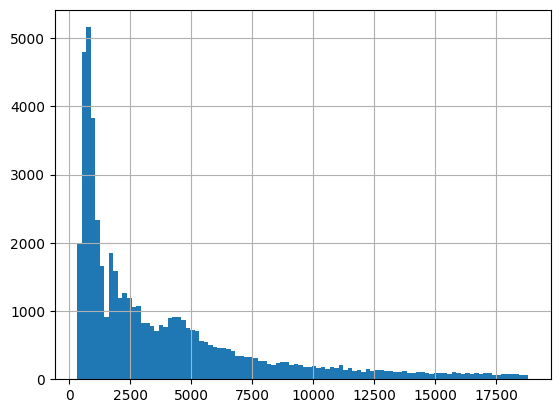

In [1064]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [1065]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [1066]:
print([1,2])

[1, 2]


In [1067]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [1068]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [1069]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75


In [1070]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [1071]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [1072]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [1073]:
reg = LinearRegression().fit(X_train, y_train)

In [1074]:
y_pred = reg.predict(X_test)

In [1075]:
score = r2_score(y_pred, y_test)

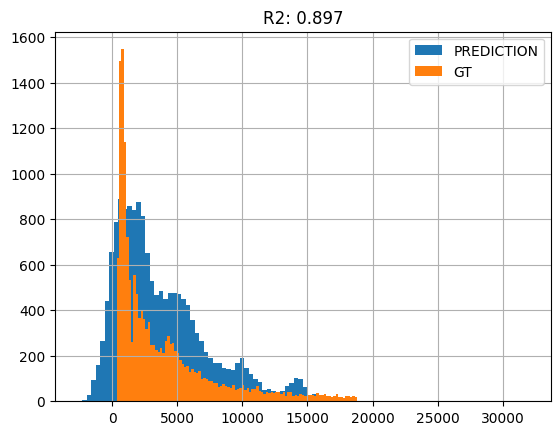

In [1076]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Создаём модель MLP для задачи регрессии

In [1077]:
class SigmoidLayer:
    def __init__(self) -> None:
        pass
    def forward(self,X):
        self.y = 1.0/(1 + np.exp(-X))
        return self.y
    def backward(self,dLdy):
        return dLdy * self.y * (1 - self.y)
    def step(self):
        pass

In [1078]:
class ReluLayer:
    def __init__(self) -> None:
        pass
    def forward(self,X):
        return np.multiply((X>0),X)
    def backward(self,dLdy):
        return (dLdy>0) * 1
    def step(self):
        pass

In [1079]:
class LinearLayer:
    def __init__(self, input_size,output_size,l_r):
        self.W = np.random.randn(input_size,output_size) 
        self.b = np.random.randn(output_size) 
        self.l_r = l_r
        
    
    def forward(self, X):
        self.X = X
        #print(X.shape, self.W.shape)
        self.Y = X @ self.W + self.b
        return self.Y
    
    def backward(self, dLdy):
        dydw = self.W
        #X [N,input,1]
        #dLdy [N,1,output]
        #print('before = ',self.X.shape,dLdy.shape)
        self.dLdw = self.X.T @  dLdy # Because it is 3D matrix
        #print('after = ',np.expand_dims(self.X, -1).shape,np.expand_dims(dLdy, -2).shape)
        #print('dLdw = ',self.dLdw)
        #pdb.set_trace()
        
        
        self.dLdb = dLdy # as dy/db == 1
          
        
        if len(self.dLdb) > 1:
             self.dLdb = self.dLdb.sum(axis=0)
        #pdb.set_trace()
        dLdx = dLdy @ self.W.T
        #print('dLdx=',dLdx)
        return dLdx
    def step(self):
        self.W -= self.dLdw * self.l_r
        self.b -= self.dLdb * self.l_r

In [1080]:
def check_gradient(f,x,eps = 1e-6):
    y = np.ones(x.shape)
    for i in range(x.shape[0]):
            if (len(x.shape) > 1):
                for j in range(x.shape[1]):
                    x[i,j] += eps
                    f_plus = f(x)
                    x[i][j] -= 2 * eps
                    f_minus = f(x)
                    x[i][j] += eps

                    y[i][j] = (f_plus - f_minus) / (2 * eps)
            else:
                    x[i] += eps
                    f_plus = f(x)
                    x[i] -= 2 * eps
                    f_minus = f(x)
                    x[i] += eps

                    y[i] = (f_plus - f_minus) / (2 * eps)
    return y

test_x = np.array([[1.2, 3.4, 5.6],[7.8,8.9,9.1]])
linearTest = LinearLayer(3,2,0.1)
linearTest.forward(test_x)
def f(W,x=test_x):
      return linearTest.forward(x).sum()
    
check_gradient(f, linearTest.W)

array([[ 9. ,  9. ],
       [12.3, 12.3],
       [14.7, 14.7]])

In [1081]:

linearTest.backward(np.ones(2))
print(linearTest.dLdw)

[ 9.  12.3 14.7]


In [1082]:
class MSELOSS:
    def __init__(self) -> None:
        pass
    def forward(self,y,y_res):
        self.n = y.shape[0]
        #print(y.shape,y_res.shape)
        self.diff = y_res - y.sum(axis = 0)
        #print(self.diff.shape)
        self.L = (self.diff ** 2).mean()
        return self.L
    def backward(self):
        dLdy =   (-1 / self.n) * (2 * self.diff)
        return dLdy
    def step():
        pass



In [1083]:
class R2LOSS:
    def __init__(self) -> None:
        pass
    def forward(self,y,y_res):
        self.n = y.shape[0]
        self.diff = y - y_res 
        self.L = 1 - ( y - y_res) ** 2
        return self.L
    def backward(self):
        dLdy =   (1 / self.n) * (2 * self.diff)
        return dLdy

In [1104]:
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(100,100),
        learning_rate=1e-6,
        max_iter=100,
        layers = None,
        loss = None
    ):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.hidden_layer_sizes = hidden_layer_sizes
        self.layers = layers
        self.loss = loss
        #if (self.layers == None):
        #    self.layers = []
        #    layer_size = hidden_layer_sizes[1]
        #    for i in range(hidden_layer_sizes[0]): #layersCount
        #        self.layers.append(LinearLayer(layer_size,layer_size,learning_rate))
        #        self.layers.append(ReluLayer())
        self.layers = []
        
        for i in range(1,len(hidden_layer_sizes)):
            self.layers.append(LinearLayer(hidden_layer_sizes[i-1],hidden_layer_sizes[i],learning_rate))
            self.layers.append(ReluLayer())
            
        #self.layers.append(LinearLayer(hidden_layer_sizes[-1],1,learning_rate))

        if (self.loss == None):
            self.loss = MSELOSS()
    
    def train(self, X, y):
        losses = []
        saved_X = X.copy()
        for i in range(self.max_iter):
            X = saved_X
            for layer in self.layers:
                X = layer.forward(X)
                #print(f'X =={X}',X)
            #print(X.shape)
            L = self.loss.forward(X,y) # On last interation the input will be the result
            print('L=',L)
            losses.append(L)
            dLdy = self.loss.backward() 
            #dLdy = L
            #print('shape.loss==',dLdy.shape)
            for layer in self.layers[::-1]:
                dLdy = layer.backward(dLdy)

            for layer in self.layers:
                layer.step()
        return losses

    def predict(self, X):
        for layer in self.layers:
                X = layer.forward(X)
        return X

In [1105]:
TestMSELOSS = MSELOSS()
chosen_size = 50
test_y = np.random.rand(chosen_size,1)
test_y_res = np.random.rand(chosen_size,1)
TestMSELOSS.forward(test_y,test_y_res)
def f_loss(W,y=test_y,y_res = test_y_res):
      return TestMSELOSS.forward(y,y_res).sum()
check_gradient(f_loss, test_y_res)

array([[-0.99679528],
       [-1.02703177],
       [-0.99144967],
       [-1.01356193],
       [-1.02073903],
       [-1.00977132],
       [-0.99069251],
       [-1.02555515],
       [-1.01323161],
       [-1.02213562],
       [-0.99444503],
       [-1.00222934],
       [-0.9877304 ],
       [-1.01699089],
       [-0.99474715],
       [-1.00137356],
       [-1.02734958],
       [-1.01129621],
       [-1.0242988 ],
       [-1.00939729],
       [-0.99933339],
       [-0.9988629 ],
       [-0.9955026 ],
       [-1.02669685],
       [-1.01035295],
       [-1.00938553],
       [-1.0259559 ],
       [-1.01406903],
       [-0.99949648],
       [-1.01746048],
       [-1.01076131],
       [-1.0255153 ],
       [-0.99647332],
       [-1.0240197 ],
       [-1.0096735 ],
       [-0.99199684],
       [-1.02370137],
       [-1.00547612],
       [-1.01395256],
       [-1.02319149],
       [-0.99994725],
       [-1.01481845],
       [-1.0271898 ],
       [-1.00553876],
       [-0.99090954],
       [-0

In [1106]:
test_y,test_y_res

(array([[0.6638361 ],
        [0.95081832],
        [0.198569  ],
        [0.41213235],
        [0.38813573],
        [0.21926083],
        [0.24789795],
        [0.56158558],
        [0.91821927],
        [0.87787446],
        [0.02691209],
        [0.9100461 ],
        [0.73241471],
        [0.30276409],
        [0.47224209],
        [0.69567787],
        [0.9837372 ],
        [0.67733636],
        [0.54742978],
        [0.84503105],
        [0.49197566],
        [0.28567827],
        [0.15838783],
        [0.01239937],
        [0.80749383],
        [0.64411341],
        [0.66150009],
        [0.79619648],
        [0.52459206],
        [0.48042667],
        [0.03667222],
        [0.40192146],
        [0.09716154],
        [0.90539449],
        [0.84201225],
        [0.2943125 ],
        [0.9319428 ],
        [0.48782077],
        [0.45834422],
        [0.90619117],
        [0.40738764],
        [0.87587397],
        [0.29776764],
        [0.46451332],
        [0.08307697],
        [0

In [1107]:
TestMSELOSS.backward()

array([[0.99679528],
       [1.02703181],
       [0.99144965],
       [1.01356195],
       [1.02073911],
       [1.0097713 ],
       [0.99069251],
       [1.02555521],
       [1.01323155],
       [1.02213556],
       [0.99444501],
       [1.00222935],
       [0.98773041],
       [1.01699093],
       [0.99474716],
       [1.00137358],
       [1.02734959],
       [1.01129622],
       [1.02429873],
       [1.00939735],
       [0.99933334],
       [0.99886295],
       [0.99550263],
       [1.02669684],
       [1.01035292],
       [1.0093855 ],
       [1.02595589],
       [1.014069  ],
       [0.99949647],
       [1.01746046],
       [1.01076133],
       [1.02551529],
       [0.99647332],
       [1.02401974],
       [1.0096735 ],
       [0.99199682],
       [1.02370135],
       [1.00547612],
       [1.01395254],
       [1.02319148],
       [0.99994724],
       [1.01481843],
       [1.02718981],
       [1.00553868],
       [0.99090952],
       [0.99326602],
       [1.01599929],
       [1.011

In [1108]:
len(features)

9

# Проверяем модель MLP на выборке Diamonds

In [1109]:
mlpRegressorTest = MLPRegressor(hidden_layer_sizes=(2,3,5))
a = np.array([[1.2,3.2],[3.4,5.6]])
b = np.array([1.3,2.3]).reshape(-1,1)

In [1110]:
print(mlpRegressorTest.layers[0].W)
#mlpRegressorTest.layers[0].dLdw

[[-0.93475953 -0.51283223  1.07101139]
 [ 0.57008795 -0.60170662 -1.32496696]]


In [1111]:
mlpRegressorTest.train(a,b)


L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.891433408849223
L= 2.89143340

[2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,
 2.891433408849223,


In [1112]:
mlpRegressor = MLPRegressor(hidden_layer_sizes=(len(features),100),learning_rate=1e-4,max_iter=8000)

In [1113]:
print(X_train)

[[0.05197505 0.75       0.83333333 ... 0.45623836 0.08285229 0.09685535]
 [0.31185031 1.         0.33333333 ... 0.7122905  0.12852292 0.14937107]
 [0.07068607 1.         0.16666667 ... 0.49068901 0.08981324 0.10062893]
 ...
 [0.07276507 0.5        0.33333333 ... 0.49255121 0.09032258 0.10125786]
 [0.07068607 1.         0.33333333 ... 0.49068901 0.08913413 0.10125786]
 [0.03950104 0.75       0.5        ... 0.44134078 0.07962649 0.09025157]]


In [1114]:
mlpRegressor.layers[0].W

array([[ 8.21777584e-01,  1.05188330e+00,  2.67219953e-01,
         7.42708641e-01,  8.26764678e-01, -1.51619486e+00,
         2.17375133e+00, -1.01453308e+00,  5.66187806e-01,
        -2.45885511e-01, -1.00565266e+00, -6.75035465e-01,
        -4.71167547e-02,  9.69700289e-01,  1.22967248e+00,
         9.13126933e-01,  1.79559436e-01, -1.69062150e+00,
        -8.07533423e-02, -1.38680545e+00,  1.67131774e+00,
         2.59599368e-01,  7.93728738e-01, -1.52069067e+00,
        -1.97492502e-01,  2.01814837e+00, -7.61394387e-02,
         1.88437632e+00,  5.30616964e-01,  1.85138971e-01,
         1.85755285e+00,  7.94915344e-01,  1.72881586e+00,
        -7.26349127e-01, -1.84923365e+00,  4.73237922e-01,
         1.39704054e-01, -1.23748877e-01,  1.92070752e-01,
        -5.56030107e-01,  1.33567093e+00,  1.52596772e-01,
        -3.63893171e-01, -2.92135833e-01,  1.48198156e+00,
        -1.13721532e-02,  7.01302344e-01, -1.46091940e+00,
         1.58832113e+00, -8.56451913e-01, -1.24056845e+0

In [1115]:
losses_mlp = mlpRegressor.train(X_train,y_train)

L= 1754110827.2433364
L= 31413316.202277176
L= 31413739.471705165
L= 31414049.059815925


L= 31414272.680645373
L= 31414468.035260122
L= 31414578.06989612
L= 31414687.842208613
L= 31414768.33209328
L= 31414848.626701165
L= 31414928.729221895
L= 31415008.707281426
L= 31415088.648271892
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.537104663
L= 31415168.

KeyboardInterrupt: 

In [ ]:
y_pred_mlp = mlpRegressor.predict(X_test)


In [ ]:
mlpRegressor.layers[0].W

array([[-4.80909984e-02,  3.92315071e-01,  7.69057865e-01,
        -5.51068564e+00,  6.32694719e-01, -4.21197107e-01,
        -5.86390808e+00, -4.29345181e+00, -9.19524808e-01,
         9.01803328e-01],
       [ 1.02995421e-02, -1.07896866e+00,  8.10981980e-01,
        -2.77225689e+01, -4.65440778e-01,  1.70064218e+00,
        -2.60866638e+01, -2.77593163e+01,  1.76635715e-02,
        -1.06068778e-01],
       [-2.26019190e-01, -4.52608567e-02,  1.06820424e+00,
        -1.66731469e+01,  2.97599992e-01,  7.13325790e-01,
        -1.85828119e+01, -1.55902138e+01, -9.79990767e-01,
         1.77134089e-01],
       [ 1.82086288e+00,  1.44636740e+00, -4.39609092e-01,
        -1.70054244e+01,  1.78390583e+00, -2.08160839e+00,
        -1.56485552e+01, -1.73167055e+01, -1.05530282e+00,
        -1.76766468e+00],
       [ 8.14443025e-01,  1.17006089e+00,  7.56494097e-01,
        -1.93936681e+01,  5.96030038e-01,  6.01822429e-02,
        -1.89029522e+01, -1.87092673e+01,  4.38354191e-01,
         3.

In [ ]:
score_mlp = r2_score(y_pred_mlp, y_test)

In [ ]:
print(y_pred_mlp)

[[3832.73118523]
 [3832.73118523]
 [3832.73118523]
 ...
 [3832.73118523]
 [3832.73118523]
 [3832.73118523]]


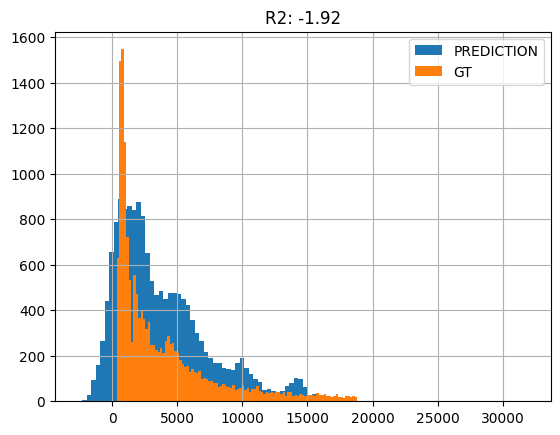

In [ ]:
plt.title(f'R2: {str(score_mlp)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

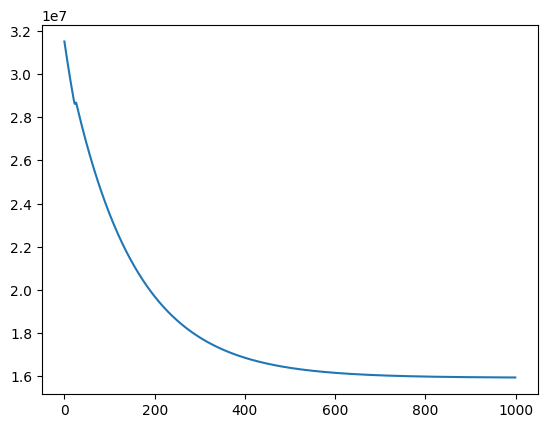

In [ ]:
plt.plot(losses_mlp)
plt.show()

In [ ]:
print(losses_mlp)
losses_mlp[-1]

[31515225.868749857, 31371480.207935847, 31229951.879713878, 31089719.427662067, 30950770.986344554, 30813094.798969023, 30676679.216391902, 30541512.696132716, 30407583.801397465, 30274881.200110912, 30143393.66395771, 30013110.067432426, 29884019.38689809, 29756110.699653525, 29629373.183009114, 29503796.113371074, 29379368.865334123, 29256080.910782397, 29133921.817998655, 29012881.250781648, 28894437.36323787, 28781081.560389698, 28685204.757970326, 28629824.313508246, 28618697.794667326, 28646497.944476552, 28682066.090315834, 28601352.221220456, 28512762.045448475, 28424790.915677242, 28337434.506168067, 28250688.52140944, 28164548.695905816, 28079010.793967854, 27994070.609504156, 27909723.96581444, 27825966.715384174, 27742794.7396806, 27660203.948950246, 27578190.282017816, 27496749.7060865, 27415878.21653964, 27335571.836743873, 27255826.617853515, 27176638.63861646, 27098004.005181316, 27019918.850905962, 26942379.336167395, 26865381.648172945, 26788922.000772774, 26712996.6

15937323.591127014